In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from tqdm import tqdm
from sklearn.cluster import KMeans

import os

In [2]:
def extract_lab_features(image):
    image_np = np.array(image)
    
    # Convert the image to LAB color space
    lab_image = cv2.cvtColor(image_np, cv2.COLOR_BGR2LAB)
    
    # Create a mask for non-black pixels
    non_black_mask = np.any(image_np != [0, 0, 0], axis=-1)
    
    # Compute the mean LAB values, ignoring black pixels
    l_mean = np.mean(lab_image[:, :, 0][non_black_mask])
    a_mean = np.mean(lab_image[:, :, 1][non_black_mask])
    b_mean = np.mean(lab_image[:, :, 2][non_black_mask])
    
    return [l_mean, a_mean, b_mean]

In [3]:
features_train = []

In [5]:
image_path = '../dataset_original/all'
images = os.listdir(image_path)
for image_file in tqdm(images, "Parsing images"):
    image_path = '../dataset_original/all'
    if image_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_path, image_file)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Unable to read image at {image_path}")
            continue
        
        features_train.append(extract_lab_features(image))

Parsing images: 100%|██████████| 1066/1066 [00:09<00:00, 106.82it/s]


In [6]:
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features_train)
labels = kmeans.labels_

c:\Users\ezrat\anaconda3\envs\Standard\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


In [7]:
features_array = np.array(features_train)

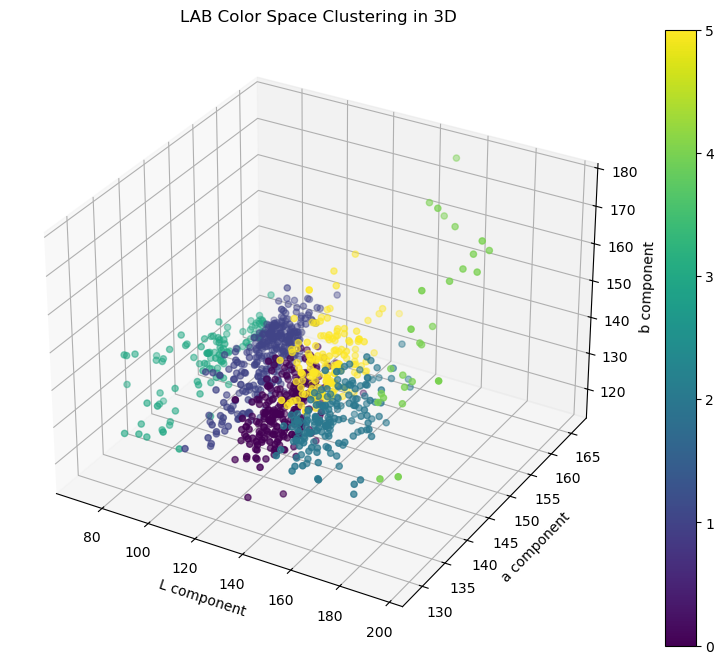

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(features_array[:, 0], 
                     features_array[:, 1], 
                     features_array[:, 2], 
                     c=labels, 
                     cmap='viridis')

# Set labels for each axis
ax.set_xlabel('L component')
ax.set_ylabel('a component')
ax.set_zlabel('b component')

# Set title
ax.set_title('LAB Color Space Clustering in 3D')

# Add a color bar
plt.colorbar(scatter)

# Show the plot
plt.show()